# Lecture 12 - Support Vector Machines 

## Dr J Rogel-Salazar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import svm, datasets, metrics 

In [3]:
iris = datasets.load_iris() 

In [4]:
classifier = svm.SVC().fit(iris.data, iris.target) 

In [5]:
classifier.predict(iris.data)  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Let us have a look at some metrics

print metrics.classification_report(classifier.predict(iris.data), iris.target) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      1.00      0.98        48
          2       1.00      0.96      0.98        52

avg / total       0.99      0.99      0.99       150



## Kernel methods

In [8]:
# To make the plotting easier, let us concentrate on the first two features:

X = iris.data[:,:2] 
Y = iris.target 
h = 0.02 # the step size of the mesh 


In [11]:
# we now create an instance of the SVM and fit our data.
# We do not scale our data since we want to ploit out "support vectors"

C = 1.0 # SVM regularisation parameter
svc = svm.SVC(kernel= 'linear', C=C).fit(X,Y) 
rbf = svm.SVC(kernel = 'rbf', gamma=0.7, C=C).fit(X,Y) 
poly_svm = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y) 

In [12]:
# Let us know create a mesh for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [13]:
# Titles for the plot
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomila kernel',
          'LinearSVC (linear kernel)'] 

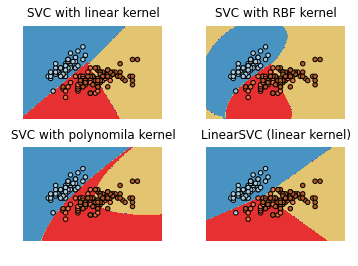

In [16]:
# let us create the plots!!!

for i, clf in enumerate((svc, rbf, poly_svm, lin_svc)):
    
    # Plot the decision boundary. For this we will assign a colour 
    # to each point in the mesh
    plt.subplot(2, 2, i+1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    
    # Put the result into a colour plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
    plt.axis('off')
    
    # Let us also plot the training points 
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.Paired)
    
    plt.title(titles[i]) 
    
    